# Projet Pyhton
## Analyse des Avis et Alertes ANSSI avec Enrichissement des CVEs

Le projet a pour but de développer un outil permettant d’analyser et d’enrichir les données sur les vulnérabilités et menaces en cybersécurité publiées par l’**ANSSI** (Agence Nationale de la Sécurité des Systèmes d’Information), afin d’aider à mieux identifier, prioriser et prévenir les risques, tout en générant des alertes personnalisées pour renforcer la sécurité des systèmes informatiques.

Vous trouverez ici les graphiques et les analyses de données des CVEs enrichis.

Si une erreur persiste, executez cette commande dans votre CLI :

```pip install pandas matplotlib scipy numpy seaborn```

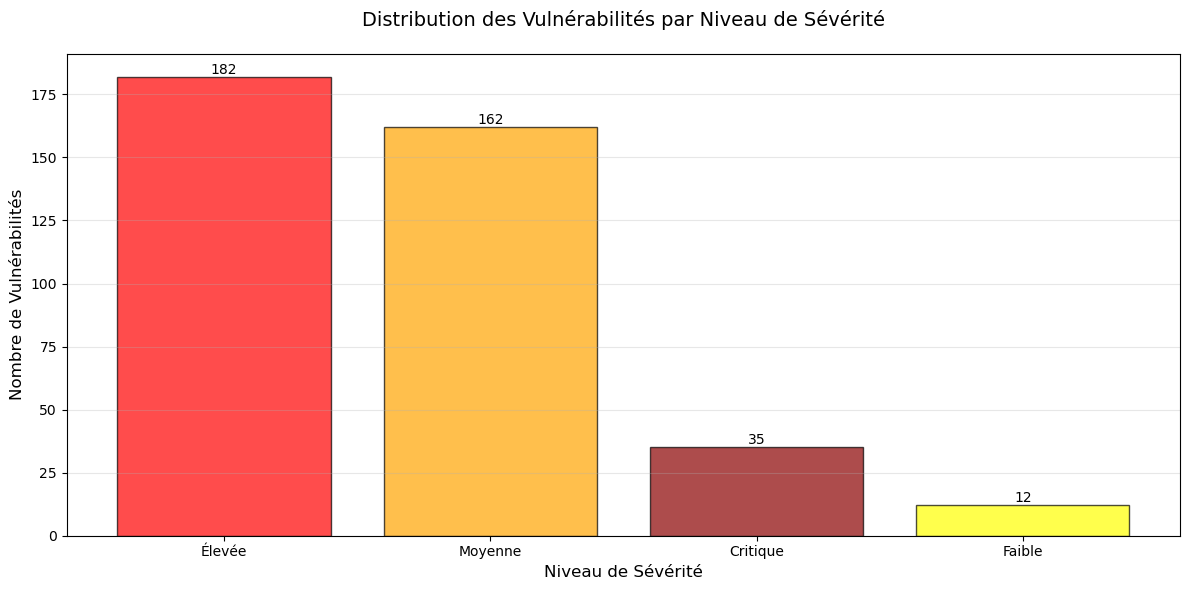


Statistiques par niveau de sévérité :
Niveau de Sévérité  Nombre de Vulnérabilités  Pourcentage
            Élevée                       182        46.55
           Moyenne                       162        41.43
          Critique                        35         8.95
            Faible                        12         3.07


In [3]:
# Import des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt

# Lecture du fichier CSV
df = pd.read_csv('dataframe.csv')

# Fonction pour catégoriser les scores CVSS
def categorize_cvss(score):
    try:
        score = float(score)
        if score >= 9.0:
            return 'Critique'
        elif score >= 7.0:
            return 'Élevée'
        elif score >= 4.0:
            return 'Moyenne'
        elif score >= 0.1:
            return 'Faible'
        else:
            return 'Non défini'
    except:
        return 'Non défini'

# Application de la catégorisation
df['Severity'] = df['Score CVSS'].apply(categorize_cvss)

# Comptage des vulnérabilités par niveau de sévérité
severity_counts = df['Severity'].value_counts()

# Définition des couleurs pour chaque niveau
colors = {
    'Critique': 'darkred',
    'Élevée': 'red',
    'Moyenne': 'orange',
    'Faible': 'yellow'
}

# Filtrage pour n'avoir que les 4 niveaux principaux
severity_counts = severity_counts[severity_counts.index.isin(['Critique', 'Élevée', 'Moyenne', 'Faible'])]

# Création de la figure et des axes
plt.figure(figsize=(12, 6))

# Création du graphique à barres
bars = plt.bar(severity_counts.index, severity_counts.values, 
        color=[colors.get(x, 'gray') for x in severity_counts.index],
        edgecolor='black',
        alpha=0.7)

# Ajout des valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

# Personnalisation du graphique
plt.title('Distribution des Vulnérabilités par Niveau de Sévérité', 
          fontsize=14, 
          pad=20)
plt.xlabel('Niveau de Sévérité', fontsize=12)
plt.ylabel('Nombre de Vulnérabilités', fontsize=12)

# Ajout d'une grille pour une meilleure lisibilité
plt.grid(True, alpha=0.3, axis='y')

# Ajustement des marges
plt.tight_layout()

# Affichage du graphique
plt.show()

# Création d'un DataFrame pour les statistiques par niveau de sévérité
stats_df = pd.DataFrame({
    'Niveau de Sévérité': severity_counts.index,
    'Nombre de Vulnérabilités': severity_counts.values,
    'Pourcentage': (severity_counts.values / severity_counts.sum() * 100).round(2)
})

# Affichage du tableau des statistiques
print("\nStatistiques par niveau de sévérité :")
print(stats_df.to_string(index=False))

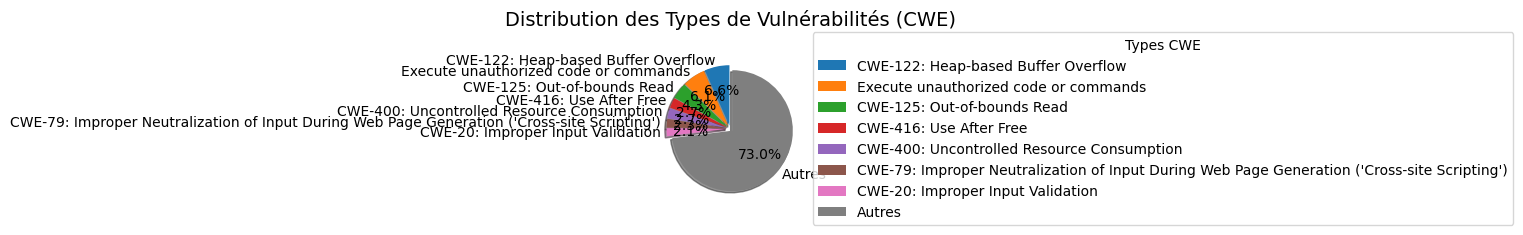

Type CWE,Nombre,Pourcentage
CWE-122: Heap-based Buffer Overflow,34,6.600000
Execute unauthorized code or commands,31,6.100000
CWE-125: Out-of-bounds Read,22,4.300000
CWE-416: Use After Free,14,2.700000
CWE-400: Uncontrolled Resource Consumption,14,2.700000
CWE-79: Improper Neutralization of Input During Web Page Generation ('Cross-site Scripting'),12,2.300000
CWE-20: Improper Input Validation,11,2.100000
Autres,374,73.000000


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture du fichier CSV
df = pd.read_csv('dataframe.csv')

# Comptage des types CWE
cwe_counts = df['Type CWE'].value_counts()

# Regroupement des catégories moins fréquentes
threshold = cwe_counts.sum() * 0.02  # 2% du total
other_count = cwe_counts[cwe_counts < threshold].sum()
cwe_counts_filtered = cwe_counts[cwe_counts >= threshold]
cwe_counts_filtered['Autres'] = other_count

# Création de la figure avec une taille plus grande
plt.figure(figsize=(12, 8))

# Création du diagramme circulaire
plt.pie(cwe_counts_filtered, 
        labels=cwe_counts_filtered.index,
        autopct='%1.1f%%',  # Affichage des pourcentages
        startangle=90,      # Rotation du diagramme
        shadow=True,        # Ajout d'une ombre
        explode=[0.05] * len(cwe_counts_filtered))  # Séparation légère des sections

# Titre
plt.title('Distribution des Types de Vulnérabilités (CWE)', 
          pad=20, 
          fontsize=14)

# Ajout d'une légende
plt.legend(cwe_counts_filtered.index,
          title="Types CWE",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Ajustement de la mise en page
plt.tight_layout()

# Affichage du graphique
plt.show()

# Création d'un tableau récapitulatif
summary_df = pd.DataFrame({
    'Type CWE': cwe_counts_filtered.index,
    'Nombre': cwe_counts_filtered.values,
    'Pourcentage': (cwe_counts_filtered.values / cwe_counts_filtered.sum() * 100).round(1)
})

# Affichage du tableau
display(summary_df.style.set_properties(**{
    'text-align': 'left',
    'padding': '5px'
}).hide(axis='index'))

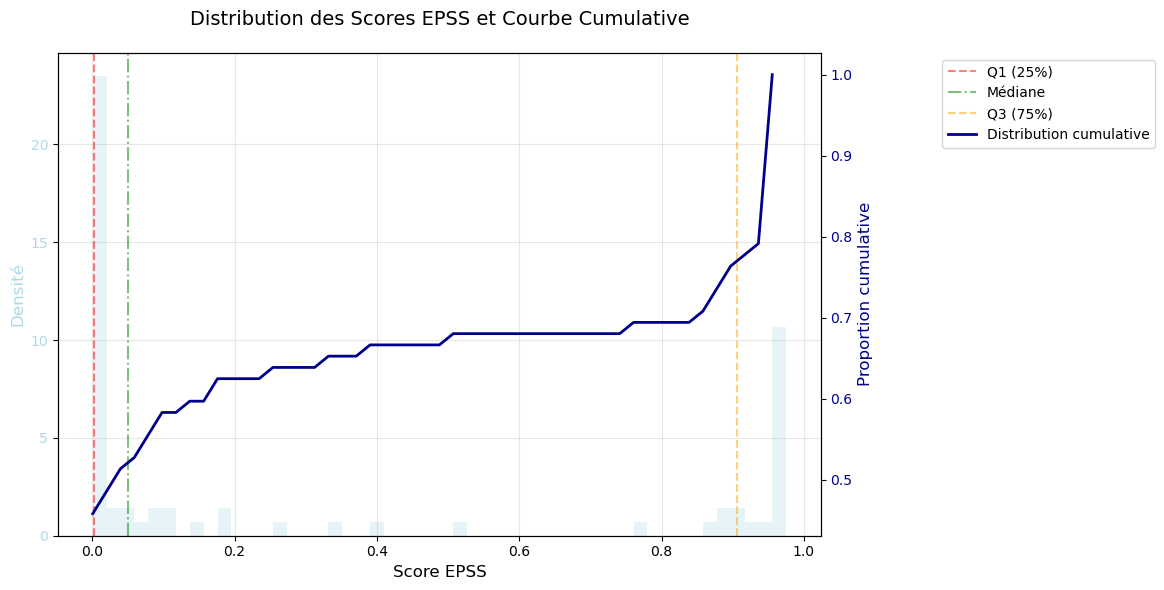

Statistique,Valeur
Nombre de valeurs,72
Moyenne,0.3386
Écart-type,0.4263
Minimum,0.0004
Premier quartile (25%),0.0018
Médiane,0.0500
Troisième quartile (75%),0.9060
Maximum,0.9751


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lecture du fichier CSV
df = pd.read_csv('dataframe.csv')

# Création d'une figure avec deux sous-graphiques superposés
fig, ax1 = plt.subplots(figsize=(12, 6))

# Création de l'histogramme (en arrière-plan)
counts, bins, _ = ax1.hist(df['Score EPSS'].dropna(), 
                          bins=50,
                          color='lightblue',
                          alpha=0.3,
                          density=True)

# Création de l'axe secondaire pour la courbe cumulative
ax2 = ax1.twinx()

# Calcul et tracé de la courbe cumulative
cumulative = np.cumsum(counts) / np.sum(counts)
ax2.plot(bins[:-1], cumulative, 
         color='darkblue', 
         linewidth=2, 
         label='Distribution cumulative')

# Personnalisation du graphique
ax1.set_title('Distribution des Scores EPSS et Courbe Cumulative', 
              fontsize=14, 
              pad=20)
ax1.set_xlabel('Score EPSS', fontsize=12)
ax1.set_ylabel('Densité', fontsize=12, color='lightblue')
ax2.set_ylabel('Proportion cumulative', fontsize=12, color='darkblue')

# Ajout d'une grille
ax1.grid(True, alpha=0.3)

# Ajustement des couleurs des axes
ax1.tick_params(axis='y', labelcolor='lightblue')
ax2.tick_params(axis='y', labelcolor='darkblue')

# Ajout de lignes de référence pour les quartiles
quartiles = df['Score EPSS'].dropna().quantile([0.25, 0.5, 0.75])
styles = ['--', '-.', '--']
colors = ['red', 'green', 'orange']
labels = ['Q1 (25%)', 'Médiane', 'Q3 (75%)']

for q, style, color, label in zip(quartiles, styles, colors, labels):
    ax1.axvline(x=q, linestyle=style, color=color, alpha=0.5, label=label)

# Ajout des légendes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
          loc='upper left', 
          bbox_to_anchor=(1.15, 1))

# Ajustement de la mise en page
plt.tight_layout()

# Affichage du graphique
plt.show()

# Création d'un tableau des statistiques descriptives
stats_desc = df['Score EPSS'].describe()
stats_df = pd.DataFrame({
    'Statistique': [
        'Nombre de valeurs',
        'Moyenne',
        'Écart-type',
        'Minimum',
        'Premier quartile (25%)',
        'Médiane',
        'Troisième quartile (75%)',
        'Maximum'
    ],
    'Valeur': [
        f"{stats_desc['count']:.0f}",
        f"{stats_desc['mean']:.4f}",
        f"{stats_desc['std']:.4f}",
        f"{stats_desc['min']:.4f}",
        f"{stats_desc['25%']:.4f}",
        f"{stats_desc['50%']:.4f}",
        f"{stats_desc['75%']:.4f}",
        f"{stats_desc['max']:.4f}"
    ]
})

# Affichage du tableau
display(stats_df.style.set_properties(**{
    'text-align': 'left',
    'padding': '5px'
}).hide(axis='index'))

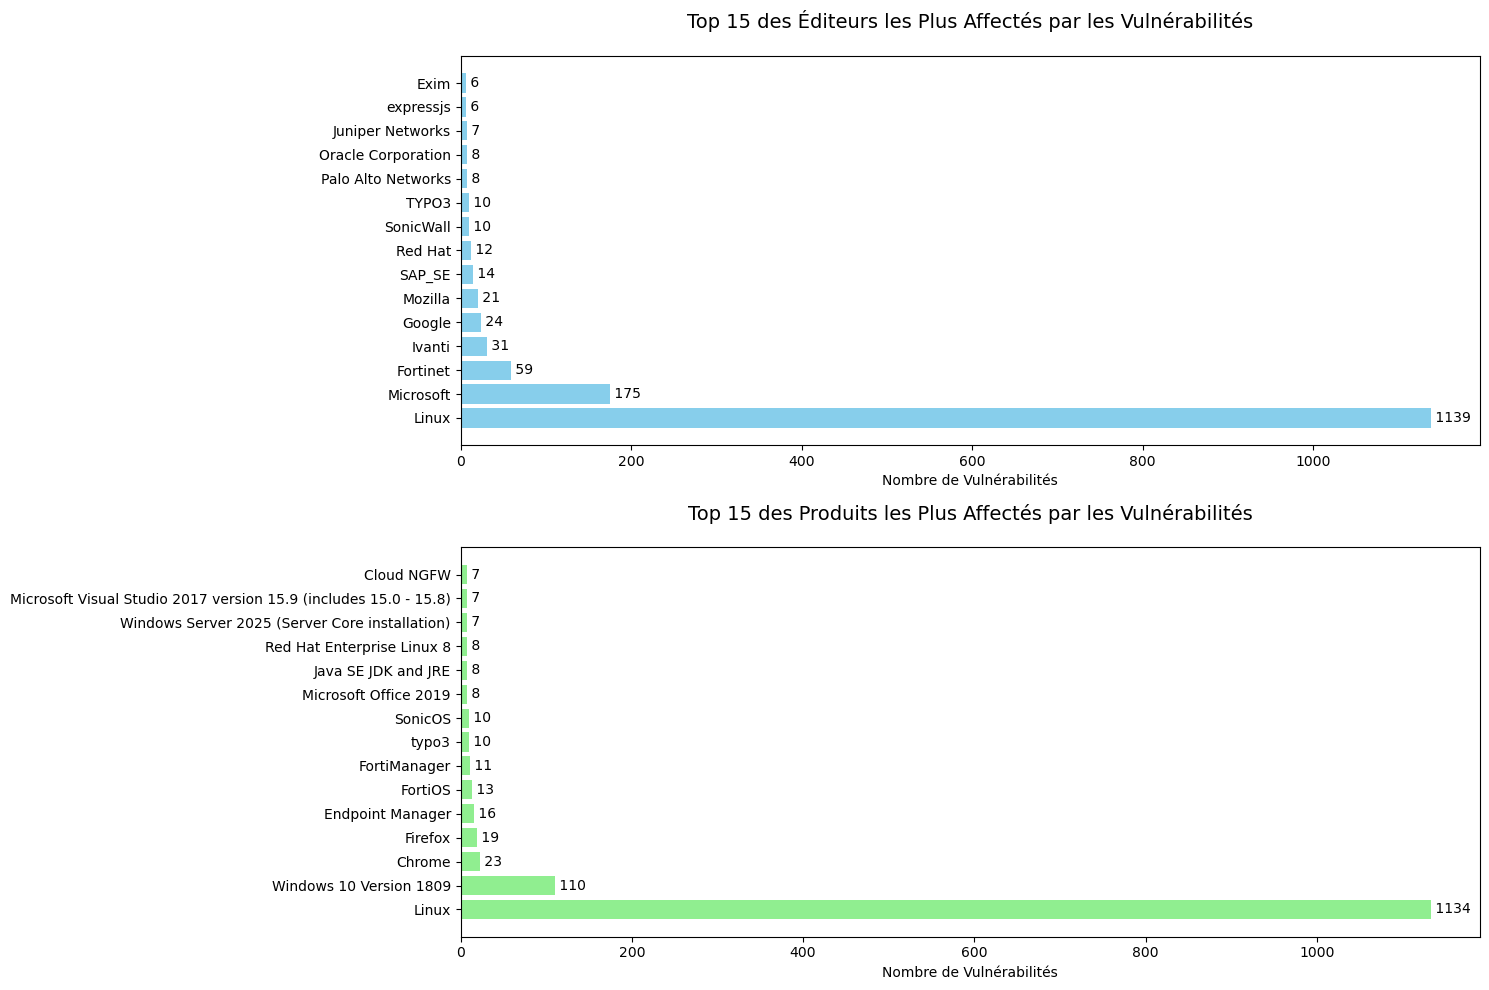

Statistiques des Éditeurs les Plus Affectés:


Éditeur,Nombre de Vulnérabilités,Pourcentage du Total
Linux,1139,66.070000
Microsoft,175,10.150000
Fortinet,59,3.420000
Ivanti,31,1.800000
Google,24,1.390000
Mozilla,21,1.220000
SAP_SE,14,0.810000
Red Hat,12,0.700000
SonicWall,10,0.580000
TYPO3,10,0.580000



Statistiques des Produits les Plus Affectés:


Produit,Nombre de Vulnérabilités,Pourcentage du Total
Linux,1134,65.780000
Windows 10 Version 1809,110,6.380000
Chrome,23,1.330000
Firefox,19,1.100000
Endpoint Manager,16,0.930000
FortiOS,13,0.750000
FortiManager,11,0.640000
typo3,10,0.580000
SonicOS,10,0.580000
Microsoft Office 2019,8,0.460000



Statistiques Globales:
Nombre total de vulnérabilités: 1724
Nombre total d'éditeurs uniques: 63
Nombre total de produits uniques: 163
Moyenne de vulnérabilités par éditeur: 27.37
Moyenne de vulnérabilités par produit: 10.58


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture du fichier CSV
df = pd.read_csv('dataframe.csv')

# Création de deux figures séparées (une pour les éditeurs, une pour les produits)
plt.figure(figsize=(15, 10))

# 1. Top 15 des éditeurs les plus affectés
plt.subplot(2, 1, 1)
editor_counts = df['Éditeur'].value_counts().head(15)
bars = plt.barh(editor_counts.index, editor_counts.values, color='skyblue')
plt.title('Top 15 des Éditeurs les Plus Affectés par les Vulnérabilités', pad=20, fontsize=14)
plt.xlabel('Nombre de Vulnérabilités')

# Ajout des valeurs sur les barres
for i, v in enumerate(editor_counts.values):
    plt.text(v, i, f' {v}', va='center', fontsize=10)

# 2. Top 15 des produits les plus affectés
plt.subplot(2, 1, 2)
product_counts = df['Produit'].value_counts().head(15)
bars = plt.barh(product_counts.index, product_counts.values, color='lightgreen')
plt.title('Top 15 des Produits les Plus Affectés par les Vulnérabilités', pad=20, fontsize=14)
plt.xlabel('Nombre de Vulnérabilités')

# Ajout des valeurs sur les barres
for i, v in enumerate(product_counts.values):
    plt.text(v, i, f' {v}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Création des tableaux détaillés
# Pour les éditeurs
editor_stats = pd.DataFrame({
    'Éditeur': editor_counts.index,
    'Nombre de Vulnérabilités': editor_counts.values,
    'Pourcentage du Total': (editor_counts.values / len(df) * 100).round(2)
})

# Pour les produits
product_stats = pd.DataFrame({
    'Produit': product_counts.index,
    'Nombre de Vulnérabilités': product_counts.values,
    'Pourcentage du Total': (product_counts.values / len(df) * 100).round(2)
})

# Affichage des tableaux
print("Statistiques des Éditeurs les Plus Affectés:")
display(editor_stats.style.set_properties(**{
    'text-align': 'left',
    'padding': '5px'
}).hide(axis='index'))

print("\nStatistiques des Produits les Plus Affectés:")
display(product_stats.style.set_properties(**{
    'text-align': 'left',
    'padding': '5px'
}).hide(axis='index'))

# Calcul des statistiques supplémentaires
total_vulnerabilities = len(df)
total_editors = df['Éditeur'].nunique()
total_products = df['Produit'].nunique()

print(f"\nStatistiques Globales:")
print(f"Nombre total de vulnérabilités: {total_vulnerabilities}")
print(f"Nombre total d'éditeurs uniques: {total_editors}")
print(f"Nombre total de produits uniques: {total_products}")
print(f"Moyenne de vulnérabilités par éditeur: {(total_vulnerabilities/total_editors):.2f}")
print(f"Moyenne de vulnérabilités par produit: {(total_vulnerabilities/total_products):.2f}")

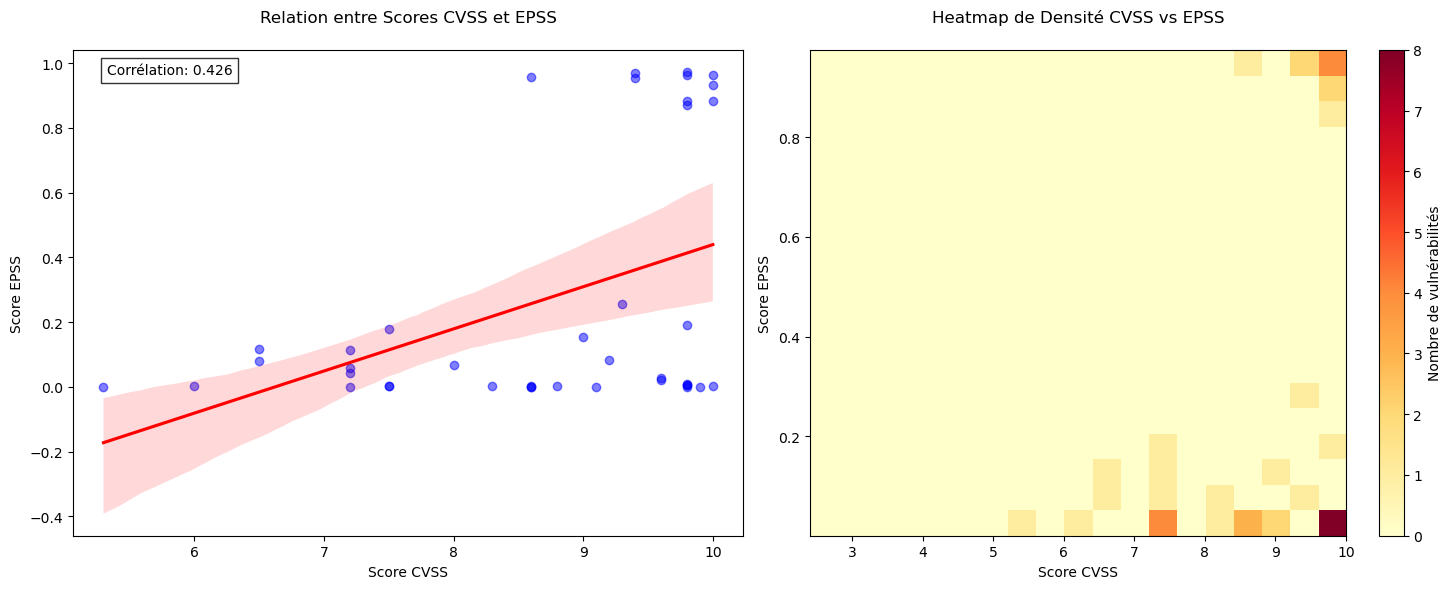

Métrique,Valeur
Coefficient de corrélation,0.426
P-value,nan
Nombre d'observations,1724
CVSS moyen,7.01
EPSS moyen,0.3386
Écart-type CVSS,1.60
Écart-type EPSS,0.4263



Analyse par quartiles de CVSS:


,mean,std,count
Score CVSS,,,
Q1,0.0010,0.0005,2
Q2,0.0685,0.0444,6
Q3,0.0606,0.1020,3
Q4,0.3511,0.4360,29


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Lecture du fichier CSV
df = pd.read_csv('dataframe.csv')

# Création d'une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Graphique de dispersion avec ligne de régression
sns.regplot(data=df, x='Score CVSS', y='Score EPSS', ax=ax1,
            scatter_kws={'alpha':0.5, 'color':'blue'},
            line_kws={'color': 'red'})

ax1.set_title('Relation entre Scores CVSS et EPSS', fontsize=12, pad=20)
ax1.set_xlabel('Score CVSS')
ax1.set_ylabel('Score EPSS')

# Calcul du coefficient de corrélation
correlation = df['Score CVSS'].corr(df['Score EPSS'])
ax1.text(0.05, 0.95, f'Corrélation: {correlation:.3f}', 
         transform=ax1.transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

# 2. Heatmap 2D
x_bins = np.linspace(df['Score CVSS'].min(), df['Score CVSS'].max(), 20)
y_bins = np.linspace(df['Score EPSS'].min(), df['Score EPSS'].max(), 20)

heatmap_data, xedges, yedges = np.histogram2d(df['Score CVSS'], df['Score EPSS'], 
                                             bins=[x_bins, y_bins])

im = ax2.imshow(heatmap_data.T, origin='lower', aspect='auto',
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                cmap='YlOrRd')

ax2.set_title('Heatmap de Densité CVSS vs EPSS', fontsize=12, pad=20)
ax2.set_xlabel('Score CVSS')
ax2.set_ylabel('Score EPSS')

plt.colorbar(im, ax=ax2, label='Nombre de vulnérabilités')

plt.tight_layout()
plt.show()

# Statistiques
statistics_df = pd.DataFrame({
    'Métrique': [
        'Coefficient de corrélation',
        'P-value',
        'Nombre d\'observations',
        'CVSS moyen',
        'EPSS moyen',
        'Écart-type CVSS',
        'Écart-type EPSS'
    ],
    'Valeur': [
        f"{correlation:.3f}",
        f"{stats.pearsonr(df['Score CVSS'], df['Score EPSS'])[1]:.3e}",
        len(df),
        f"{df['Score CVSS'].mean():.2f}",
        f"{df['Score EPSS'].mean():.4f}",
        f"{df['Score CVSS'].std():.2f}",
        f"{df['Score EPSS'].std():.4f}"
    ]
})

# Affichage du tableau des statistiques
display(statistics_df.style.set_properties(**{
    'text-align': 'left',
    'padding': '5px'
}).hide(axis='index'))

# Analyse par quartiles avec observed=True
print("\nAnalyse par quartiles de CVSS:")
cvss_quartiles = pd.qcut(df['Score CVSS'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
quartile_analysis = df.groupby(cvss_quartiles, observed=True)['Score EPSS'].agg(['mean', 'std', 'count']).round(4)
display(quartile_analysis)

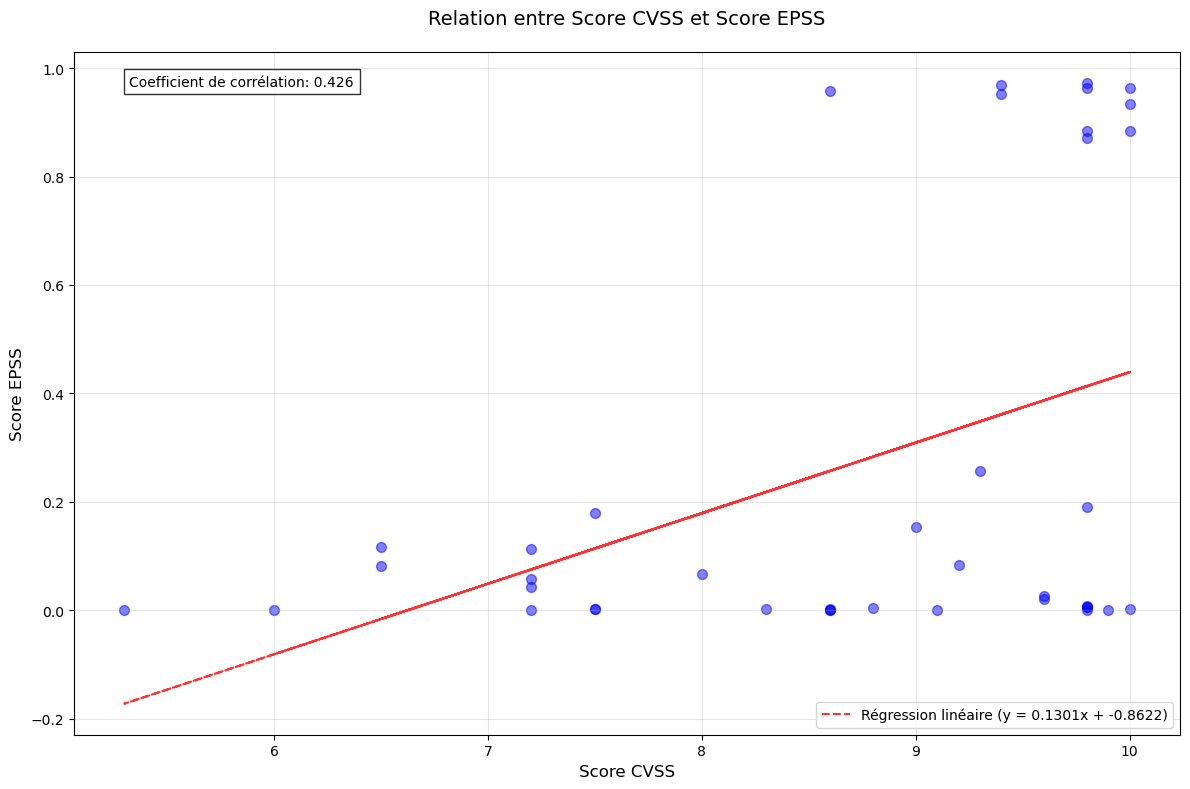


Analyse détaillée par plage de CVSS:
           Nombre  EPSS moyen  EPSS médian  Écart-type EPSS
CVSS 0-4      0.0      0.0000       0.0000           0.0000
CVSS 4-6      1.0      0.0006       0.0006              NaN
CVSS 6-8     10.0      0.0594       0.0500           0.0620
CVSS 8-10    25.0      0.2960       0.0263           0.4147

Statistiques globales:
Nombre total de vulnérabilités analysées: 40
Nombre de vulnérabilités avec données manquantes: 1684
Coefficient de corrélation: 0.426
P-value: 6.078e-03
CVSS moyen: 8.70
EPSS moyen: 0.2694
CVSS médian: 9.15
EPSS médian: 0.0500


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Lecture du fichier CSV
df = pd.read_csv('dataframe.csv')

# Conversion des scores en valeurs numériques
df['Score CVSS'] = pd.to_numeric(df['Score CVSS'].replace('n/a', pd.NA), errors='coerce')
df['Score EPSS'] = pd.to_numeric(df['Score EPSS'].replace('n/a', pd.NA), errors='coerce')

# Suppression des valeurs manquantes
df_clean = df.dropna(subset=['Score CVSS', 'Score EPSS'])

# Vérification s'il y a des données valides
if len(df_clean) > 0:
    # Création de la figure
    plt.figure(figsize=(12, 8))

    # Création du nuage de points
    plt.scatter(df_clean['Score CVSS'], df_clean['Score EPSS'], 
               alpha=0.5,
               c='blue',
               s=50)

    # Ajout de la ligne de régression
    z = np.polyfit(df_clean['Score CVSS'], df_clean['Score EPSS'], 1)
    p = np.poly1d(z)
    plt.plot(df_clean['Score CVSS'], p(df_clean['Score CVSS']), 
             "r--", 
             alpha=0.8,
             label=f'Régression linéaire (y = {z[0]:.4f}x + {z[1]:.4f})')

    # Calcul et ajout du coefficient de corrélation
    correlation = df_clean['Score CVSS'].corr(df_clean['Score EPSS'])
    plt.text(0.05, 0.95, 
             f'Coefficient de corrélation: {correlation:.3f}', 
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

    # Personnalisation du graphique
    plt.title('Relation entre Score CVSS et Score EPSS', fontsize=14, pad=20)
    plt.xlabel('Score CVSS', fontsize=12)
    plt.ylabel('Score EPSS', fontsize=12)

    # Ajout d'une grille
    plt.grid(True, alpha=0.3)

    # Ajout de la légende
    plt.legend()

    # Ajustement des marges
    plt.tight_layout()

    # Affichage du graphique
    plt.show()

    # Analyse statistique par plage de CVSS
    def calculate_statistics_by_cvss_range(df, range_start, range_end):
        mask = (df['Score CVSS'] >= range_start) & (df['Score CVSS'] < range_end)
        subset = df[mask]
        if len(subset) == 0:
            return pd.Series({'Nombre': 0, 'EPSS moyen': 0, 'EPSS médian': 0, 'Écart-type EPSS': 0})
        return pd.Series({
            'Nombre': len(subset),
            'EPSS moyen': subset['Score EPSS'].mean(),
            'EPSS médian': subset['Score EPSS'].median(),
            'Écart-type EPSS': subset['Score EPSS'].std()
        })

    # Création des plages CVSS
    ranges = [(0,4), (4,6), (6,8), (8,10)]
    stats_by_range = pd.DataFrame([
        calculate_statistics_by_cvss_range(df_clean, start, end) 
        for start, end in ranges
    ], index=[f'CVSS {start}-{end}' for start, end in ranges])

    # Formatage des valeurs numériques
    stats_by_range = stats_by_range.round(4)

    # Affichage des statistiques
    print("\nAnalyse détaillée par plage de CVSS:")
    print(stats_by_range.to_string())

    # Statistiques globales
    print("\nStatistiques globales:")
    print(f"Nombre total de vulnérabilités analysées: {len(df_clean)}")
    print(f"Nombre de vulnérabilités avec données manquantes: {len(df) - len(df_clean)}")
    print(f"Coefficient de corrélation: {correlation:.3f}")
    if len(df_clean) > 1:  # On vérifie qu'il y a assez de données pour calculer la p-value
        p_value = stats.pearsonr(df_clean['Score CVSS'], df_clean['Score EPSS'])[1]
        print(f"P-value: {p_value:.3e}")
    print(f"CVSS moyen: {df_clean['Score CVSS'].mean():.2f}")
    print(f"EPSS moyen: {df_clean['Score EPSS'].mean():.4f}")
    print(f"CVSS médian: {df_clean['Score CVSS'].median():.2f}")
    print(f"EPSS médian: {df_clean['Score EPSS'].median():.4f}")

else:
    print("Aucune donnée valide trouvée pour l'analyse CVSS-EPSS")

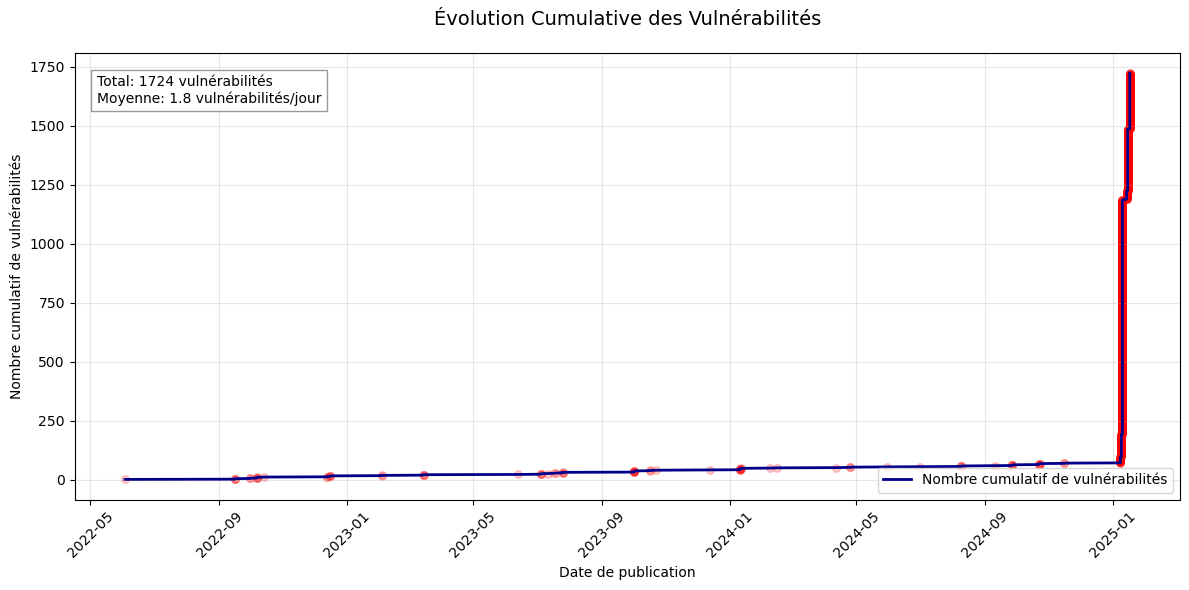


Statistiques détaillées:
Première vulnérabilité: 2022-06-03
Dernière vulnérabilité: 2025-01-17
Période totale: 959 jours
Nombre total de vulnérabilités: 1724
Moyenne quotidienne: 1.80

Distribution par mois:
Date de publication
2022-06       1
2022-09       5
2022-10       5
2022-12       5
2023-02       2
2023-03       3
2023-06       1
2023-07       9
2023-10       9
2023-12       1
2024-01       7
2024-02       2
2024-04       3
2024-05       1
2024-07       1
2024-08       3
2024-09       5
2024-10       5
2024-11       2
2025-01    1654
Freq: M, dtype: int64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture et préparation des données
df = pd.read_csv('dataframe.csv')
df['Date de publication'] = pd.to_datetime(df['Date de publication'])

# Tri des données par date
df_sorted = df.sort_values('Date de publication')

# Création du compteur cumulatif
df_sorted['Cumulative'] = range(1, len(df_sorted) + 1)

# Création de la figure
plt.figure(figsize=(12, 6))

# Tracer la courbe cumulative
plt.plot(df_sorted['Date de publication'], 
         df_sorted['Cumulative'], 
         color='darkblue', 
         linewidth=2,
         label='Nombre cumulatif de vulnérabilités')

# Ajouter les points pour montrer les occurrences individuelles
plt.scatter(df_sorted['Date de publication'],
           df_sorted['Cumulative'],
           color='red',
           alpha=0.2,
           s=30)

# Personnalisation du graphique
plt.title('Évolution Cumulative des Vulnérabilités', 
          fontsize=14, 
          pad=20)
plt.xlabel('Date de publication')
plt.ylabel('Nombre cumulatif de vulnérabilités')

# Rotation des dates
plt.xticks(rotation=45)

# Ajout des statistiques dans un cadre
total_days = (df_sorted['Date de publication'].max() - df_sorted['Date de publication'].min()).days
daily_avg = len(df) / total_days if total_days > 0 else 0

stats = f'Total: {len(df)} vulnérabilités\n'
stats += f'Moyenne: {daily_avg:.1f} vulnérabilités/jour'

# Ajout du texte avec un fond blanc
plt.text(0.02, 0.95, stats,
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', 
                  edgecolor='gray',
                  alpha=0.8),
         verticalalignment='top')

# Ajout de la grille
plt.grid(True, alpha=0.3)

# Ajout de la légende
plt.legend()

# Ajustement de la mise en page
plt.tight_layout()

# Affichage
plt.show()

# Statistiques complémentaires
print("\nStatistiques détaillées:")
print(f"Première vulnérabilité: {df_sorted['Date de publication'].min().strftime('%Y-%m-%d')}")
print(f"Dernière vulnérabilité: {df_sorted['Date de publication'].max().strftime('%Y-%m-%d')}")
print(f"Période totale: {total_days} jours")
print(f"Nombre total de vulnérabilités: {len(df)}")
print(f"Moyenne quotidienne: {daily_avg:.2f}")

# Distribution mensuelle
monthly = df_sorted.groupby(df_sorted['Date de publication'].dt.to_period('M')).size()
print("\nDistribution par mois:")
print(monthly)

/var/folders/nw/9zkybps13xgbx9gd7cpzv6n00000gn/T/ipykernel_64698/3557892693.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot([df_filtered[df_filtered['Éditeur'] == editor]['Score CVSS'].dropna()


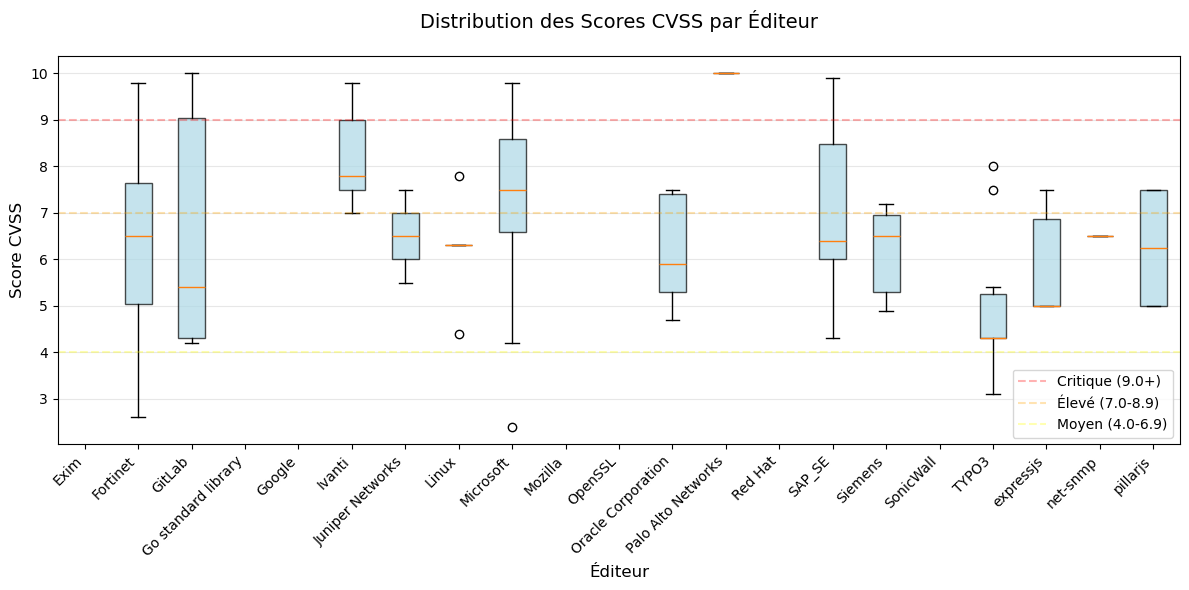


Statistiques par éditeur:
                     Nombre  Moyenne  Écart-type  Minimum  Médiane  Maximum
Éditeur                                                                    
Palo Alto Networks        1    10.00         NaN     10.0    10.00     10.0
Ivanti                   22     8.13        1.01      7.0     7.80      9.8
Microsoft               175     7.37        1.39      2.4     7.50      9.8
SAP_SE                   14     6.91        1.81      4.3     6.40      9.9
GitLab                    6     6.53        2.78      4.2     5.40     10.0
Juniper Networks          7     6.50        0.82      5.5     6.50      7.5
net-snmp                  6     6.50        0.00      6.5     6.50      6.5
Fortinet                 59     6.45        1.93      2.6     6.50      9.8
pillarjs                  4     6.25        1.44      5.0     6.25      7.5
Linux                     5     6.22        1.21      4.4     6.30      7.8
Oracle Corporation        8     6.18        1.11      4.7    

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture du fichier CSV
df = pd.read_csv('dataframe.csv')

# Conversion des scores CVSS en numérique
df['Score CVSS'] = pd.to_numeric(df['Score CVSS'].replace('n/a', pd.NA), errors='coerce')

# Compter le nombre de vulnérabilités par éditeur
editor_counts = df.groupby('Éditeur').size()
top_editors = editor_counts[editor_counts >= 5].index

# Filtrer pour les éditeurs principaux
df_filtered = df[df['Éditeur'].isin(top_editors)]

# Créer la figure
plt.figure(figsize=(12, 6))

# Créer le boxplot
boxplot = plt.boxplot([df_filtered[df_filtered['Éditeur'] == editor]['Score CVSS'].dropna() 
                      for editor in top_editors],
                     labels=top_editors,
                     patch_artist=True)

# Personnaliser les couleurs
for box in boxplot['boxes']:
    box.set_facecolor('lightblue')
    box.set_alpha(0.7)

# Personnalisation du graphique
plt.title('Distribution des Scores CVSS par Éditeur', fontsize=14, pad=20)
plt.xlabel('Éditeur', fontsize=12)
plt.ylabel('Score CVSS', fontsize=12)

# Rotation des labels
plt.xticks(rotation=45, ha='right')

# Ajout des lignes de référence pour les niveaux de criticité
plt.axhline(y=9.0, color='red', linestyle='--', alpha=0.3, label='Critique (9.0+)')
plt.axhline(y=7.0, color='orange', linestyle='--', alpha=0.3, label='Élevé (7.0-8.9)')
plt.axhline(y=4.0, color='yellow', linestyle='--', alpha=0.3, label='Moyen (4.0-6.9)')

# Légende
plt.legend()

# Ajout d'une grille
plt.grid(True, axis='y', alpha=0.3)

# Ajustement de la mise en page
plt.tight_layout()

# Affichage du graphique
plt.show()

# Statistiques par éditeur
stats = df_filtered.groupby('Éditeur').agg({
    'Score CVSS': ['count', 'mean', 'std', 'min', 'median', 'max']
}).round(2)

stats.columns = ['Nombre', 'Moyenne', 'Écart-type', 'Minimum', 'Médiane', 'Maximum']
stats = stats.sort_values(('Moyenne'), ascending=False)

print("\nStatistiques par éditeur:")
print(stats)

/var/folders/nw/9zkybps13xgbx9gd7cpzv6n00000gn/T/ipykernel_64698/3513252249.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot([df_filtered[df_filtered['Éditeur'] == editor]['Score CVSS'].dropna()


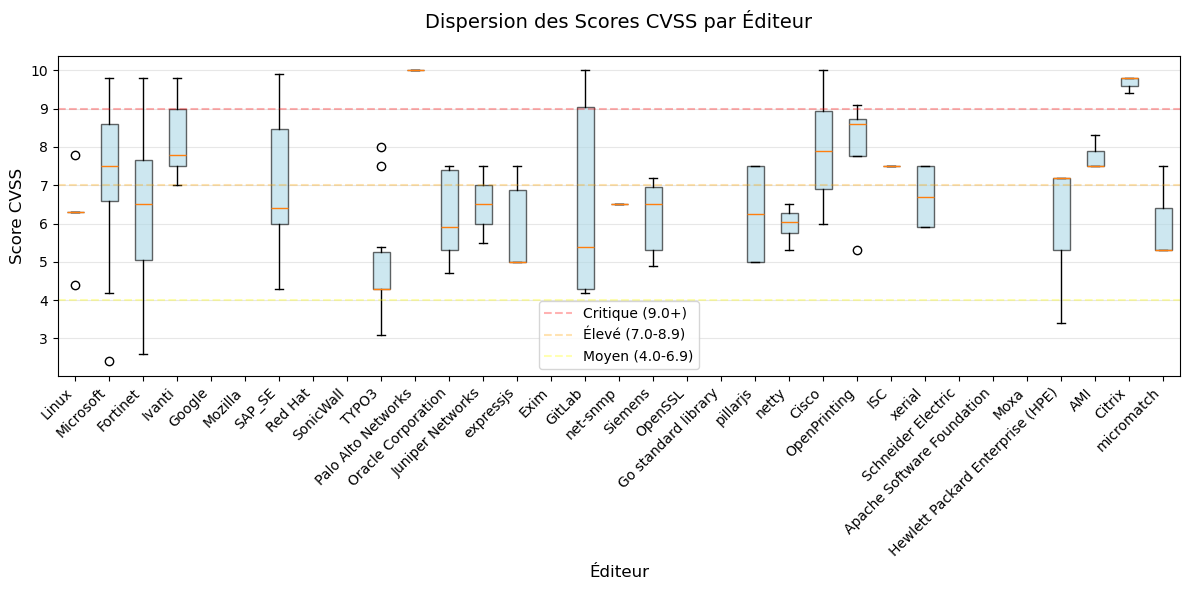


Statistiques par éditeur:
                                  Nombre de vulnérabilités  Moyenne  Médiane  \
Éditeur                                                                        
Microsoft                                              175     7.37     7.50   
Fortinet                                                59     6.45     6.50   
Ivanti                                                  22     8.13     7.80   
SAP_SE                                                  14     6.91     6.40   
TYPO3                                                   10     5.03     4.30   
Oracle Corporation                                       8     6.18     5.90   
Juniper Networks                                         7     6.50     6.50   
Siemens                                                  6     6.18     6.50   
expressjs                                                6     5.83     5.00   
net-snmp                                                 6     6.50     6.50   
GitLab       

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture et préparation des données
df = pd.read_csv('dataframe.csv')
df['Score CVSS'] = pd.to_numeric(df['Score CVSS'].replace('n/a', pd.NA), errors='coerce')

# Trouver les éditeurs les plus affectés (au moins 3 vulnérabilités)
editor_counts = df['Éditeur'].value_counts()
top_editors = editor_counts[editor_counts >= 3].index

# Filtrer les données pour ces éditeurs
df_filtered = df[df['Éditeur'].isin(top_editors)]

# Créer une figure
plt.figure(figsize=(12, 6))

# Créer le boxplot
boxplot = plt.boxplot([df_filtered[df_filtered['Éditeur'] == editor]['Score CVSS'].dropna() 
                      for editor in top_editors],
                     labels=top_editors,
                     patch_artist=True)

# Personnaliser les boîtes
for box in boxplot['boxes']:
    box.set_facecolor('lightblue')
    box.set_alpha(0.6)

# Ajouter des lignes de référence pour les niveaux de criticité
plt.axhline(y=9.0, color='red', linestyle='--', alpha=0.3, label='Critique (9.0+)')
plt.axhline(y=7.0, color='orange', linestyle='--', alpha=0.3, label='Élevé (7.0-8.9)')
plt.axhline(y=4.0, color='yellow', linestyle='--', alpha=0.3, label='Moyen (4.0-6.9)')

# Personnalisation du graphique
plt.title('Dispersion des Scores CVSS par Éditeur', fontsize=14, pad=20)
plt.xlabel('Éditeur', fontsize=12)
plt.ylabel('Score CVSS', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)
plt.legend()

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

# Statistiques par éditeur
stats = df_filtered.groupby('Éditeur').agg({
    'Score CVSS': ['count', 'mean', 'median', 'std', 'min', 'max']
}).round(2)

stats.columns = ['Nombre de vulnérabilités', 'Moyenne', 'Médiane', 'Écart-type', 'Minimum', 'Maximum']
stats = stats.sort_values(('Nombre de vulnérabilités'), ascending=False)

print("\nStatistiques par éditeur:")
print(stats)

/var/folders/nw/9zkybps13xgbx9gd7cpzv6n00000gn/T/ipykernel_64698/3745839785.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_editors = vulnerabilities_by_editor_sorted[vulnerabilities_by_editor['Total'] >= 3].copy()


<Figure size 1200x800 with 0 Axes>

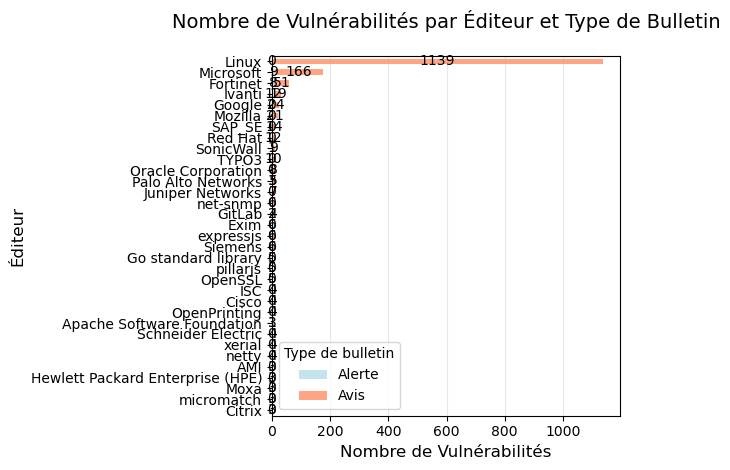


Statistiques par éditeur:

Nombre total de vulnérabilités par éditeur et répartition:
                                      Total  % Avis  % Alerte
Éditeur                                                      
Linux                                  1139   100.0       0.0
Microsoft                               175    94.9       5.1
Fortinet                                 59    86.4      13.6
Ivanti                                   31    61.3      38.7
Google                                   24   100.0       0.0
Mozilla                                  21   100.0       0.0
SAP_SE                                   14   100.0       0.0
Red Hat                                  12   100.0       0.0
SonicWall                                10    90.0      10.0
TYPO3                                    10   100.0       0.0
Palo Alto Networks                        8    62.5      37.5
Oracle Corporation                        8   100.0       0.0
Juniper Networks                          7  

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Lecture des données
df = pd.read_csv('dataframe.csv')

# Compter le nombre de vulnérabilités par éditeur et type de bulletin
vulnerabilities_by_editor = pd.crosstab(df['Éditeur'], df['Type de bulletin'])

# Trier par nombre total de vulnérabilités décroissant
vulnerabilities_by_editor['Total'] = vulnerabilities_by_editor.sum(axis=1)
vulnerabilities_by_editor_sorted = vulnerabilities_by_editor.sort_values('Total', ascending=True).drop('Total', axis=1)

# Sélectionner les top éditeurs (avec plus de 3 vulnérabilités)
top_editors = vulnerabilities_by_editor_sorted[vulnerabilities_by_editor['Total'] >= 3].copy()

# Créer la figure
plt.figure(figsize=(12, 8))

# Créer le graphique à barres horizontales empilées
bars = top_editors.plot(kind='barh', 
                       stacked=True,
                       color=['lightblue', 'coral'],
                       alpha=0.7)

# Personnalisation
plt.title('Nombre de Vulnérabilités par Éditeur et Type de Bulletin', fontsize=14, pad=20)
plt.xlabel('Nombre de Vulnérabilités', fontsize=12)
plt.ylabel('Éditeur', fontsize=12)

# Ajout des valeurs sur les barres
for c in bars.containers:
    # Ajout des labels pour chaque segment
    bars.bar_label(c, fmt='%.0f', label_type='center')

# Ajout d'une grille verticale
plt.grid(True, axis='x', alpha=0.3)

# Ajustement de la mise en page
plt.tight_layout()

# Affichage du graphique
plt.show()

# Statistiques détaillées
print("\nStatistiques par éditeur:")
stats = pd.DataFrame({
    'Total': vulnerabilities_by_editor['Total'],
    '% Avis': (vulnerabilities_by_editor['Avis'] / vulnerabilities_by_editor['Total'] * 100).round(1),
    '% Alerte': (vulnerabilities_by_editor['Alerte'] / vulnerabilities_by_editor['Total'] * 100).round(1)
}).sort_values('Total', ascending=False)

stats['% Avis'] = stats['% Avis'].fillna(0)
stats['% Alerte'] = stats['% Alerte'].fillna(0)

print("\nNombre total de vulnérabilités par éditeur et répartition:")
print(stats.to_string())

# Statistiques globales
print("\nStatistiques globales:")
total_vulnerabilities = len(df)
total_avis = len(df[df['Type de bulletin'] == 'Avis'])
total_alertes = len(df[df['Type de bulletin'] == 'Alerte'])

print(f"Nombre total de vulnérabilités: {total_vulnerabilities}")
print(f"Nombre d'avis: {total_avis} ({(total_avis/total_vulnerabilities*100):.1f}%)")
print(f"Nombre d'alertes: {total_alertes} ({(total_alertes/total_vulnerabilities*100):.1f}%)")